# Machine Learning
---

The following ML models are tested:
- Decision Tree Classification
- Logistic Regression Classification
- Support Vector Machine Classification
- Random Forest Classification

## Initialization

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

from sklearn.metrics import f1_score, precision_score, confusion_matrix, accuracy_score

In [2]:
jobData = pd.read_csv("Datasets/cleaned_data.csv")
jobData.head(5)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,country_code_is_TW,country_code_is_UA,country_code_is_UG,country_code_is_US,country_code_is_VI,country_code_is_VN,country_code_is_ZA,country_code_is_ZM,country_code,lemmatized_documents
0,1,Marketing Intern,"US, NY, New York",Marketing,0,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,marketing intern marketing food52 create groun...
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,0,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,False,...,False,False,False,False,False,False,False,False,NZ,customer service - cloud video production succ...
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NODEPARTMENT,0,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NOBENEFITS,False,...,False,False,False,True,False,False,False,False,US,commission machinery assistant cma nodepartmen...
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,0,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,False,...,False,False,False,True,False,False,False,False,US,account executive - washington dc sale passion...
4,5,Bill Review Manager,"US, FL, Fort Worth",NODEPARTMENT,0,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,False,...,False,False,False,True,False,False,False,False,US,bill review manager nodepartment spotsource so...


## Naive Bayes model on Text columns

In [3]:
from sklearn.feature_extraction.text import CountVectorizer
#Bigram is used. It finds count of each pair words in the text. feature extraction
cv = CountVectorizer(ngram_range=(2,2))

#Vectorizer converts the list of words into a proper matrix of word counts for each word, for each data entry
X_text_data = cv.fit_transform(jobData['lemmatized_documents'])
y_text_data = jobData['fraudulent']
X_text_data

<17880x893991 sparse matrix of type '<class 'numpy.int64'>'
	with 4116089 stored elements in Compressed Sparse Row format>

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

X_text_train, X_text_test, y_text_train, y_text_test = train_test_split(X_text_data, y_text_data, test_size=0.3)
mnb = MultinomialNB()
mnb.fit(X_text_train, y_text_train)

MultinomialNB()

Accuracy:	 0.9900926813678491
F1 score:	 0.9041731066460587


<AxesSubplot:>

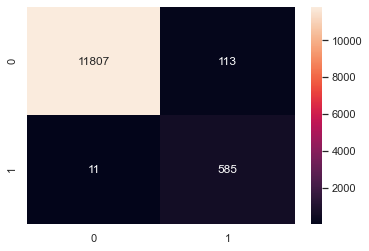

In [5]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

pred_text_train = pd.DataFrame(mnb.predict(X_text_train), columns=['prediction'], index=y_text_train.index)

print("Accuracy:\t", mnb.score(X_text_train, y_text_train))
print("F1 score:\t", f1_score(y_text_train, pred_text_train))
sb.heatmap(confusion_matrix(y_text_train, pred_text_train), annot=True, fmt='d')

Accuracy:	 0.9157345264727815
F1 score:	 0.5032967032967032


<AxesSubplot:>

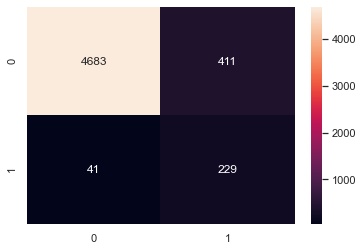

In [6]:
pred_text_test = pd.DataFrame(mnb.predict(X_text_test), columns=['prediction'], index=y_text_test.index)

print("Accuracy:\t", mnb.score(X_text_test, y_text_test))
print("F1 score:\t", f1_score(y_text_test, pred_text_test))
sb.heatmap(confusion_matrix(y_text_test, pred_text_test), annot=True, fmt='d')

In [7]:
nlp_pred = pd.DataFrame(mnb.predict_proba(X_text_data), columns=['nlp_p_real', 'nlp_p_fraud'])['nlp_p_fraud']
nlp_pred

0        3.635724e-148
1         0.000000e+00
2         3.337887e-90
3         0.000000e+00
4        1.976093e-191
             ...      
17875     0.000000e+00
17876    9.748588e-154
17877    1.260484e-144
17878     1.805592e-31
17879     0.000000e+00
Name: nlp_p_fraud, Length: 17880, dtype: float64

In [8]:
jobData["NLP_Pred"] = nlp_pred

## Preparing the train and test datasets


In [9]:
y = pd.DataFrame(jobData['fraudulent'])

to_drop = ['job_id', 'title', 'location', 'department', 'salary_range', 'company_profile', 'description', 'requirements', 'benefits', 'employment_type', 'required_experience', 'required_education', 'industry', 'function', 'country_code', 'fraudulent', 'lemmatized_documents']
X = jobData.copy()
X.drop(to_drop, axis = 1, inplace = True)

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

print("X_train:\t", len(X_train))
print("X_test:\t\t", len(X_test))
print("y_train:\t", len(y_train))
print("y_test:\t\t", len(y_test))

X_train:	 12516
X_test:		 5364
y_train:	 12516
y_test:		 5364


## Decision Tree


In [11]:
from sklearn.tree import DecisionTreeClassifier

dectree = DecisionTreeClassifier(max_depth=3)
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

Train data accuracy:	 0.9816235218919782
Train data f1_score:	 0.8130081300813009


<AxesSubplot:>

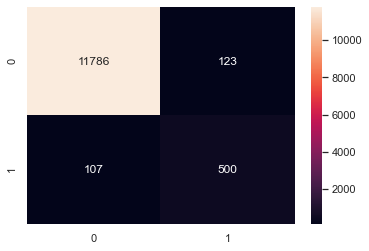

In [12]:
train_pred = pd.DataFrame(dectree.predict(X_train), columns=['prediction'], index=y_train.index)
train_results = pd.concat([y_train, train_pred], axis=1)

print("Train data accuracy:\t", dectree.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

sb.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d')

Test data accuracy:	 0.9780014914243103
Test data f1_score:	 0.7830882352941176


<AxesSubplot:>

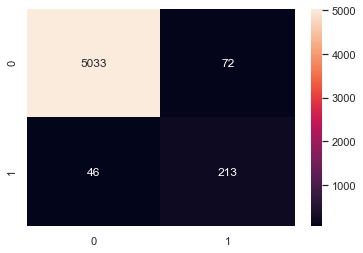

In [13]:
test_pred = pd.DataFrame(dectree.predict(X_test), columns=['prediction'], index=y_test.index)
test_results = pd.concat([y_test, test_pred], axis=1)

print("Test data accuracy:\t", dectree.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

sb.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d')

Annotation(3348, 5707.8, 'NLP_Pred <= 1.0\ngini = 0.092\nsamples = 12516\nvalue = [11909, 607]\nclass = False')
Annotation(3348, 5707.8, 'NLP_Pred <= 0.0\ngini = 0.01\nsamples = 11738\nvalue = [11679, 59]\nclass = False')
Annotation(1674, 4077, 'has_company_logo <= 0.5\ngini = 0.004\nsamples = 11360\nvalue = [11339, 21]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.022\nsamples = 1868\nvalue = [1847, 21]\nclass = False')
Annotation(837, 2446.2, 'gini = 0.0\nsamples = 9492\nvalue = [9492, 0]\nclass = False')
Annotation(1674, 4077, 'industry_is_Accounting <= 0.5\ngini = 0.181\nsamples = 378\nvalue = [340, 38]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.162\nsamples = 370\nvalue = [337, 33]\nclass = False')
Annotation(2511, 2446.2, 'gini = 0.469\nsamples = 8\nvalue = [3, 5]\nclass = True')
Annotation(3348, 5707.8, 'country_code_is_US <= 0.5\ngini = 0.416\nsamples = 778\nvalue = [230, 548]\nclass = True')
Annotation(5022, 4077, 'country_code_is_AU <= 0.5\ngini = 0.477\nsamples

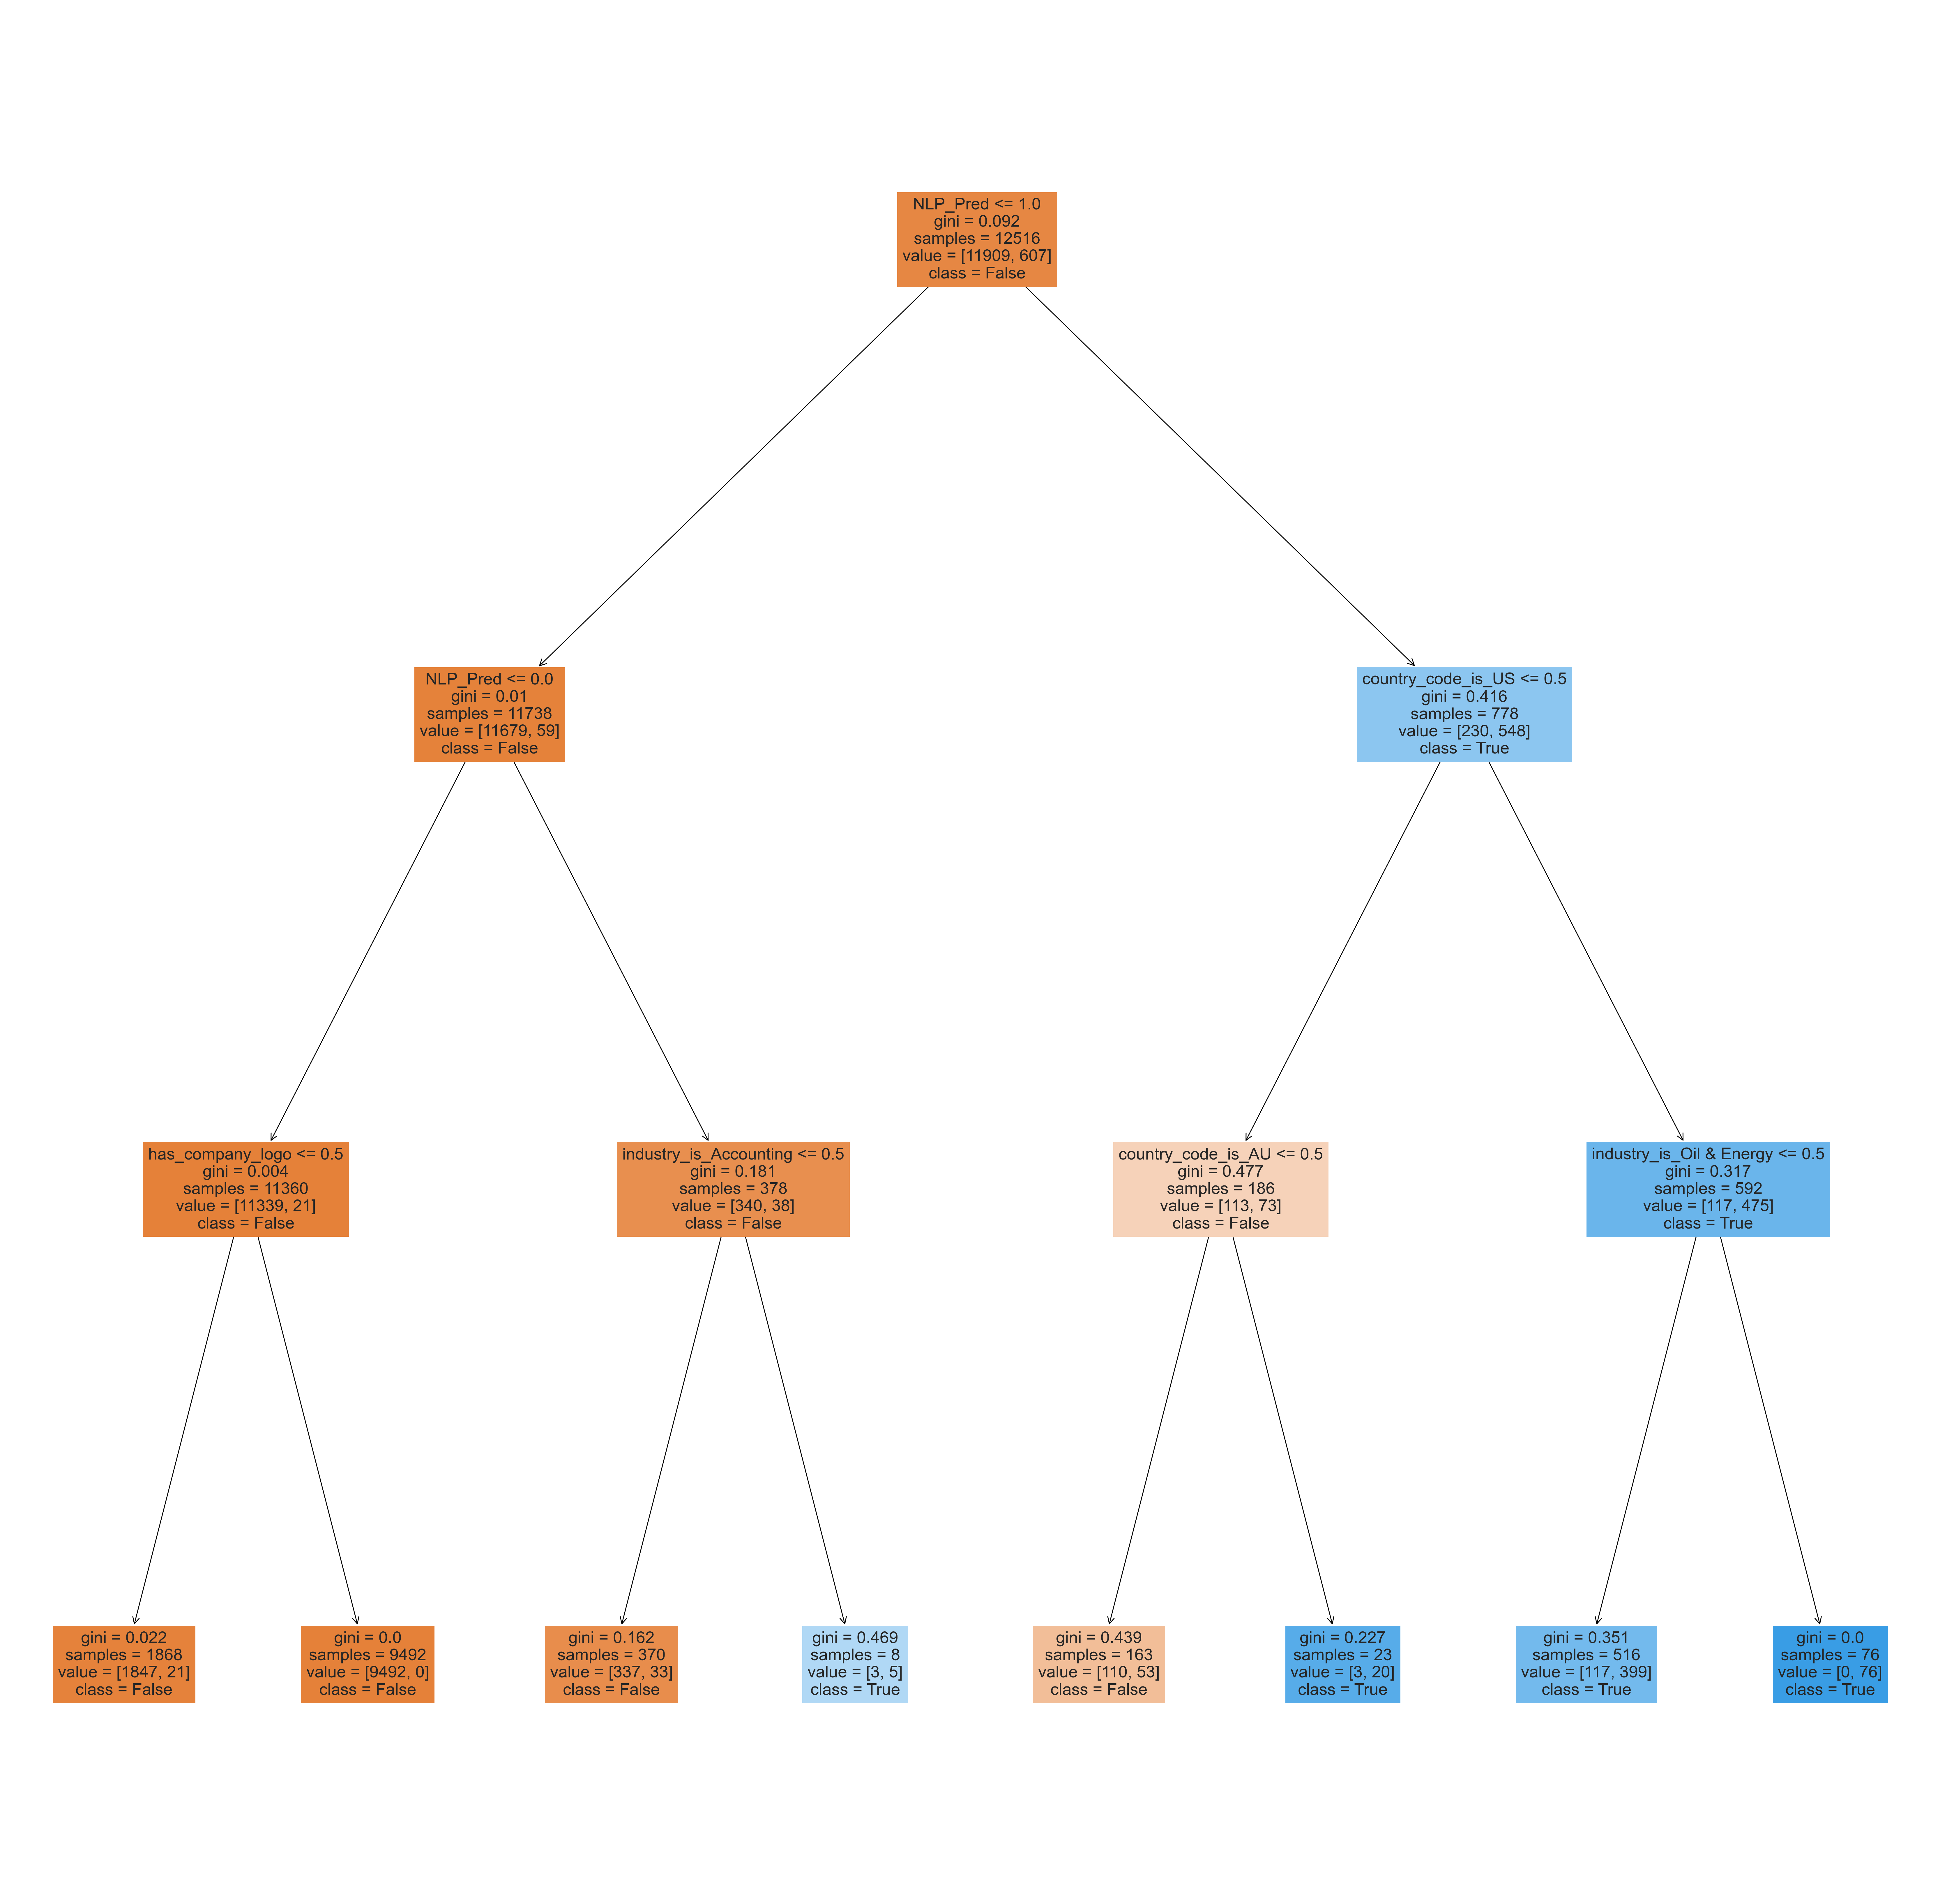

In [14]:
from sklearn.tree import plot_tree
fig, ax = plt.subplots(figsize=(120, 120))
out = plot_tree(dectree, 
          feature_names = X.columns,
          class_names = [str(x) for x in dectree.classes_],
          filled=True)

for o in out:
    print(o)
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(3)
        
plt.show()

## Logistic Regression

Uses the logistic regression model. However, the default model does not perform well on imbalanced data. The current data set has 95% of values in 1 class, which will affect the model. Hence, additional weightage must be applied to the 'fraudulent' class. 

This increases cost associated with predicting a fraudulent class wrongly in the cost function. The model now values getting a fraudulent prediction correct more than getting a not-fraudulent prediction wrong.

In [15]:
from sklearn.linear_model import LogisticRegression

#Uses a weightage of 1:16
logreg = LogisticRegression(class_weight={0: 1, 1: 16})
logreg.fit(X_train, y_train['fraudulent'])

LogisticRegression(class_weight={0: 1, 1: 16})

Train data accuracy:	 0.9617289868967721
Train data f1_score:	 0.5831157528285466


<AxesSubplot:>

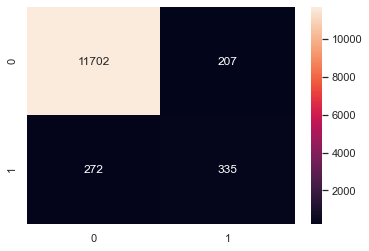

In [16]:
train_pred = pd.DataFrame(logreg.predict(X_train), columns=['prediction'], index=y_train.index)
train_results = pd.concat([y_train, train_pred], axis=1)

print("Train data accuracy:\t", logreg.score(X_train, y_train))
print("Train data f1_score:\t", f1_score(y_train, train_pred))

sb.heatmap(confusion_matrix(y_train, train_pred), annot=True, fmt='d')

Test data accuracy:	 0.9630872483221476
Test data f1_score:	 0.5991902834008097


<AxesSubplot:>

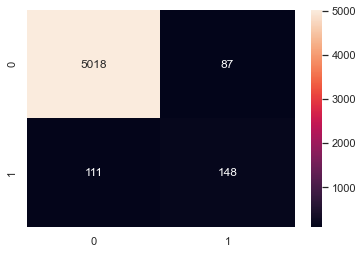

In [17]:
test_pred = pd.DataFrame(logreg.predict(X_test), columns=['prediction'], index=y_test.index)
test_results = pd.concat([y_test, test_pred], axis=1)

print("Test data accuracy:\t", logreg.score(X_test, y_test))
print("Test data f1_score:\t", f1_score(y_test, test_pred))

sb.heatmap(confusion_matrix(y_test, test_pred), annot=True, fmt='d')

## Support Vector Machine


In [18]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='rbf', gamma=0.5, C=70) # parameters to be adjusted

#Train the model using the training sets
clf.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train data Accuracy:	 0.9952860338766379
Train Data Precision:	 0.9433656957928802
Train Data F1 score:	 0.9518367346938775


<AxesSubplot:>

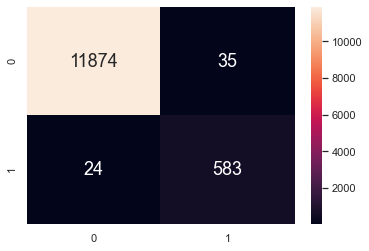

In [19]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data Accuracy:	 0.9806114839671887
Test Data Precision:	 0.8708133971291866
Test Data F1 score:	 0.7777777777777778


<AxesSubplot:>

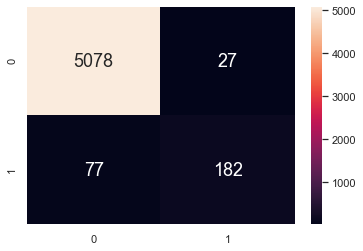

In [20]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

## Random Forest

In [21]:
#Import Random Forest Model
from sklearn.ensemble import RandomForestClassifier

#Create a Gaussian Classifier
clf = RandomForestClassifier(n_estimators=255)

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train.values.ravel())

y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

Train data Accuracy:	 0.9966442953020134
Train Data Precision:	 0.9578606158833063
Train Data F1 score:	 0.9656862745098039


<AxesSubplot:>

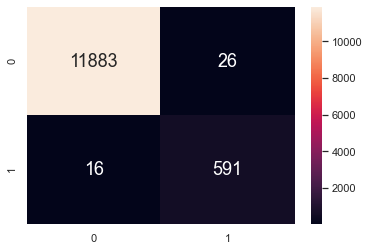

In [22]:
print("Train data Accuracy:\t", accuracy_score(y_train, y_train_pred))
print("Train Data Precision:\t", precision_score(y_train, y_train_pred))
print("Train Data F1 score:\t", f1_score(y_train, y_train_pred))

sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test data Accuracy:	 0.9867636092468307
Test Data Precision:	 0.8949579831932774
Test Data F1 score:	 0.8571428571428571


<AxesSubplot:>

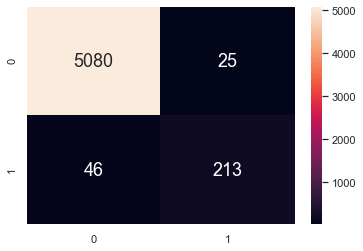

In [23]:
print("Test data Accuracy:\t", accuracy_score(y_test, y_test_pred))
print("Test Data Precision:\t", precision_score(y_test, y_test_pred))
print("Test Data F1 score:\t", f1_score(y_test, y_test_pred))

sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18})

In [24]:
feature_imp = pd.Series(clf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_imp.head(10)

NLP_Pred                                           0.461104
has_company_logo                                   0.051726
industry_is_Oil & Energy                           0.029533
salary_upper_limit                                 0.024033
has_questions                                      0.023497
salary_lower_limit                                 0.023236
country_code_is_US                                 0.019228
function_type_is_Administrative                    0.016039
industry_is_Accounting                             0.012943
required_education_is_High School or equivalent    0.010823
dtype: float64